prompt:
Transfer learning on pretrained VGG 16 (see Lecture 17) to execute on colab

step 1: build vgg 16 pretrained model (tf.keras), following crisp-dm steps

step 2: modify the code to use medical-mask github for training (modify 2 class)

step 3: allow program to input image http , then classify which class it

安裝並導入必要的庫

In [ ]:
# Install necessary packages (if needed)
!pip install tensorflow numpy matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


設置模型

In [ ]:
# Load the VGG16 model with pre-trained ImageNet weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent training on it
base_model.trainable = False

# Build the new model on top of the pre-trained VGG16
model = base_model.output
model = Flatten()(model)
model = Dense(256, activation='relu')(model)
model = Dropout(0.5)(model)
model = Dense(2, activation='softmax')(model)  # We have 2 classes: with_mask, without_mask

# Compile the model
model = Model(inputs=base_model.input, outputs=model)
# Compile the model with the correct learning rate argument
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Summary of the model
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

資料集取得

In [ ]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git


Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590 (from 1)
Receiving objects: 100% (4590/4590), 186.72 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


資料集處理

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the dataset path
base_dir = '/content/Face-Mask-Detection/dataset'
categories = ['with_mask', 'without_mask']

# Create 'train' and 'validation' directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through categories and split images
for category in categories:
    category_path = os.path.join(base_dir, category)
    images = os.listdir(category_path)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create subdirectories for each category
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

    # Move the images to the appropriate directories
    for img in train_images:
        shutil.move(os.path.join(category_path, img), os.path.join(train_dir, category, img))
    for img in val_images:
        shutil.move(os.path.join(category_path, img), os.path.join(val_dir, category, img))


資料增強

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0,1]
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random shifts
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Fill missing pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    '/content/Face-Mask-Detection/dataset/train',  # Training data directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # For 2 classes: with_mask and without_mask
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Face-Mask-Detection/dataset/validation',  # Validation data directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3273 images belonging to 2 classes.
Found 819 images belonging to 2 classes.


In [ ]:
!pip install Pillow
import requests
from PIL import Image
from io import BytesIO


圖片預處理

In [ ]:
def preprocess_image(url):
    # Download image from URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Resize image to 224x224 (VGG16 input size)
    img = img.resize((224, 224))

    # Convert image to numpy array and normalize it
    img_array = np.array(img) / 255.0

    # Ensure the shape is (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array


圖片分類

In [ ]:
def classify_image(model, image_url):
    img_array = preprocess_image(image_url)

    # Make prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]

    # Map the class index to the class label
    class_labels = ['with_mask', 'without_mask']
    predicted_class = class_labels[class_index]

    return predicted_class


顯示圖片

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image belongs to class: with_mask


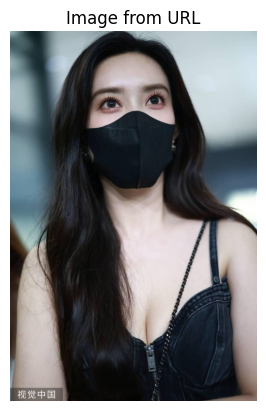

In [12]:
# 顯示圖片函數
def show_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))  # 讀取圖片
    plt.imshow(img)  # 使用 Matplotlib 顯示圖片
    plt.axis('off')  # 隱藏軸線
    plt.title('Image from URL')  # 添加標題
    plt.show()

# 使用 classify_image 並顯示圖片
image_url = 'https://na.cx/i/eqzQJYw.jpg'  # 圖片 URL
result = classify_image(model, image_url)  # 分類圖片
print(f"The image belongs to class: {result}")

# 顯示圖片
show_image_from_url(image_url)

模型訓練

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 17/103 ━━━━━━━━━━━━━━━━━━━━ 39s 464ms/step - accuracy: 0.6245 - loss: 0.7147

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 93s 661ms/step - accuracy: 0.7917 - loss: 0.4424 - val_accuracy: 0.9438 - val_loss: 0.1645
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 53s 475ms/step - accuracy: 0.9391 - loss: 0.1762 - val_accuracy: 0.9621 - val_loss: 0.0945
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 468ms/step - accuracy: 0.9547 - loss: 0.1273 - val_accuracy: 0.9487 - val_loss: 0.1214
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 50s 456ms/step - accuracy: 0.9538 - loss: 0.1249 - val_accuracy: 0.9719 - val_loss: 0.0712
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 465ms/step - accuracy: 0.9561 - loss: 0.1184 - val_accuracy: 0.9744 - val_loss: 0.0643
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 50s 457ms/step - accuracy: 0.9638 - loss: 0.0992 - val_accuracy: 0.9756 - val_loss: 0.0622
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 455ms/step - accuracy: 0.9600 - loss: 0.1011 - val_accuracy: 0.9805 - val_loss: 0.0558
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 51s 472ms/step - accuracy: 0.9642 - loss: 0.0929 - val

繪製訓練歷史圖表

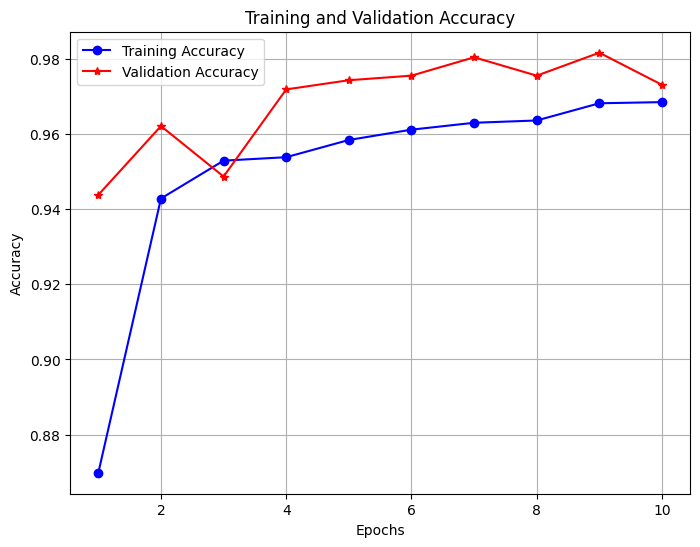

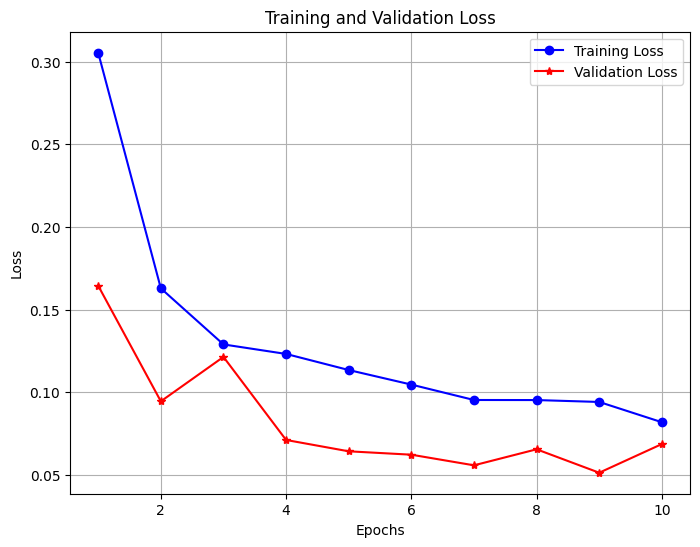

In [ ]:
# 畫圖函數：loss 和 accuracy
def plot_training_history_separate(history):
    # 提取數據
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # 繪製訓練和驗證 accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # 繪製訓練和驗證 loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# 訓練後調用畫圖函數
plot_training_history_separate(history)
